<a href="https://colab.research.google.com/github/itanvir/time-series-forecasting-lstm/blob/master/stock_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [4]:
!ls "/content/drive/My Drive/"

'Colab Notebooks'  'How to get started with Drive.pdf'	 Share


In [5]:
!ls "/content/drive/My Drive/Colab Notebooks"

time-series-forecasting-lstm


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read data
stock_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/time-series-forecasting-lstm/google_historical_quotes.csv")
stock_df["average"] = (stock_df["high"] + stock_df["low"])/2
stock_df

,date,close,volume,open,high,low,average
0,5/12/20,1375.74,1390600,1407.12,1415.00,1374.77,1394.885
1,5/11/20,1403.26,1412116,1378.28,1416.53,1377.15,1396.840
2,5/8/20,1388.37,1388068,1383.13,1398.76,1375.48,1387.120
3,5/7/20,1372.56,1399759,1365.94,1377.60,1355.27,1366.435
4,5/6/20,1347.30,1215423,1361.69,1371.12,1347.29,1359.205
...,...,...,...,...,...,...,...
1254,5/19/15,537.36,1964037,533.98,540.66,533.04,536.850
1255,5/18/15,532.30,2001117,532.01,534.82,528.85,531.835
1256,5/15/15,533.85,1965088,539.18,539.27,530.38,534.825
1257,5/14/15,538.40,1401005,533.77,539.00,532.41,535.705


In [0]:
# Only volume and average data will be used
df = stock_df[['volume', 'average']]

# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler_data = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler_data.fit_transform(df)

scaler_price = MinMaxScaler(feature_range=(0,1))
price_scaled = scaler_price.fit_transform(df['average'].values.reshape(-1, 1) )


In [0]:
# Lookback previous 50 business days
lookback= 50

X=[]
y=[]
for i in range(len(data_scaled)-lookback-1):
    t=[]
    for j in range(0,lookback):
        
        t.append(data_scaled[[(i+j)], :])
    X.append(t)
    y.append(data_scaled[i+ lookback,1])

In [27]:
# Train/test split
test_size=int(.3 * len(data_scaled))
X, y = np.array(X), np.array(y)
X = X.reshape(X.shape[0],lookback, 2)

X_train = X[0:-test_size+lookback]
y_train = y[0:-test_size+lookback]
X_test = X[:test_size+lookback]
y_test = y[:test_size+lookback]

print(X.shape)
print(X_train.shape)
print(X_test.shape)

(1208, 50, 2)
(881, 50, 2)
(427, 50, 2)


In [19]:
# Input shape for LSTM (nlookbacks x nfeatures)
input_shape = (X_train.shape[1],2)
print (input_shape)

(50, 2)


In [20]:
from keras import Sequential
from keras.layers import Dense, LSTM

# Model architecture
model = Sequential()
model.add(LSTM(units=30, return_sequences = True, input_shape = input_shape))
model.add(LSTM(units=30, return_sequences = True))
model.add(LSTM(units=30))
model.add(Dense(units=1))
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 30)            3960      
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 30)            7320      
_________________________________________________________________
lstm_3 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 18,631
Trainable params: 18,631
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compile and fit
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=200, batch_size=256)

Epoch 1/200
881/881 [==============================] - 4s 5ms/step - loss: 0.2376
Epoch 2/200
881/881 [==============================] - 2s 2ms/step - loss: 0.0346
Epoch 3/200
881/881 [==============================] - 2s 2ms/step - loss: 0.0394
Epoch 4/200
881/881 [==============================] - 2s 2ms/step - loss: 0.0094
Epoch 5/200
881/881 [==============================] - 2s 2ms/step - loss: 0.0131
Epoch 6/200
881/881 [==============================] - 2s 2ms/step - loss: 0.0153
Epoch 7/200
881/881 [==============================] - 2s 2ms/step - loss: 0.0071
Epoch 8/200
881/881 [==============================] - 2s 2ms/step - loss: 0.0065
Epoch 9/200
881/881 [==============================] - 2s 2ms/step - loss: 0.0075
Epoch 10/200
881/881 [==============================] - 2s 2ms/step - loss: 0.0047
Epoch 11/200
881/881 [==============================] - 2s 2ms/step - loss: 0.0050
Epoch 12/200
881/881 [==============================] - 2s 2ms/step - loss: 0.0045
Epoch 13/200


Text(0, 0.5, 'Stock Price')

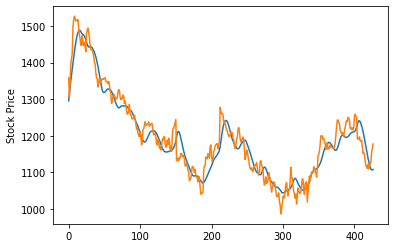

In [45]:
# Prediction
y_pred = model.predict(X_test)

# Inverse to original values
y_pred_inv = np.squeeze(scaler_price.inverse_transform(y_pred.reshape(-1, 1)))
y_test_inv = np.squeeze(scaler_price.inverse_transform(y_test.reshape(-1, 1)))

# Plot
plt.plot(y_pred_inv)
plt.plot(y_test_inv)
plt.ylabel('Stock Price')

Text(0, 0.5, 'Percent Error')

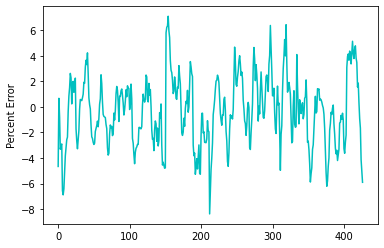

In [52]:
plt.plot((y_pred_inv-y_test_inv)/y_test_inv*100.0, 'c')
plt.ylabel('Percent Error')